In [12]:
##SECTION A
##Q1. Load and Explore

import pandas as pd
df = pd.read_csv("train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print("\nDataset shape:", df.shape)


Dataset shape: (891, 12)


In [7]:
print("\nColumn names:", df.columns.tolist())


Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
print("\nData types and non-null counts:")
print(df.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [13]:
##Q2. Missing Value Analysis
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


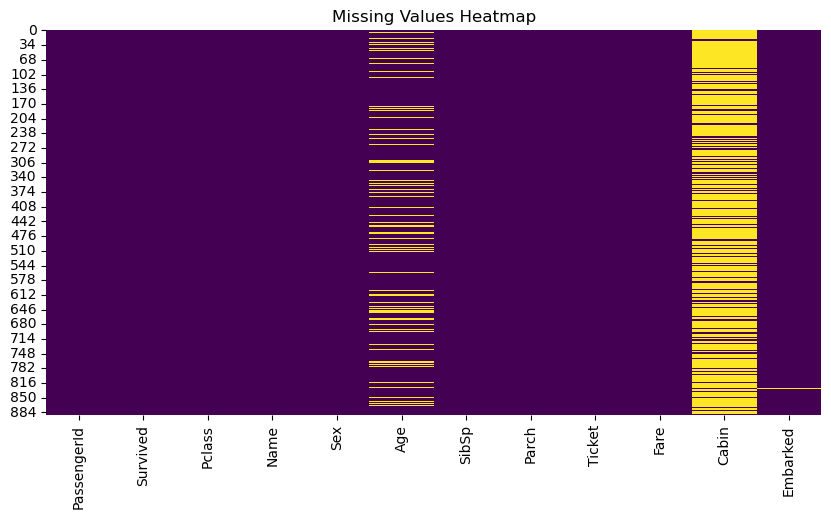

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df = df.drop('Cabin', axis=1, errors='ignore')

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [23]:
##Q3.Basic Statistics
# Summary statistics for numerical features
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
total_passengers = len(df)
print("Total passengers:", total_passengers)


Total passengers: 891


In [25]:
gender_dist = df['Sex'].value_counts()
print("\nGender distribution:")
print(gender_dist)



Gender distribution:
Sex
male      577
female    314
Name: count, dtype: int64


In [26]:
avg_age = df['Age'].mean()
avg_fare = df['Fare'].mean()

print("\nAverage Age:", round(avg_age, 2))
print("Average Fare:", round(avg_fare, 2))



Average Age: 29.36
Average Fare: 32.2


In [30]:
##Q4. Data Cleaning
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df = df.drop('Cabin', axis=1, errors='ignore')

print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize'],
      dtype='object')


In [ ]:
##SECTION B

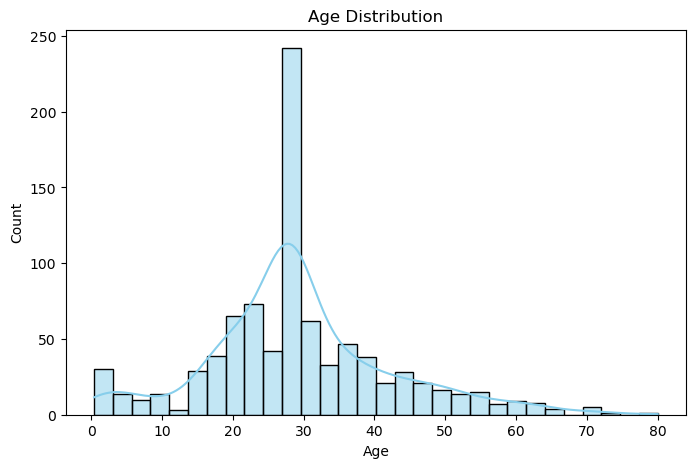

In [33]:
##Q5.Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


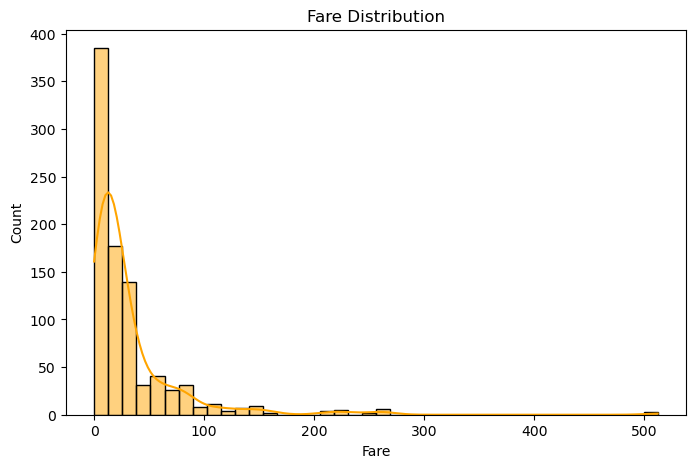

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True, color="orange")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\1952373619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette="Set2")


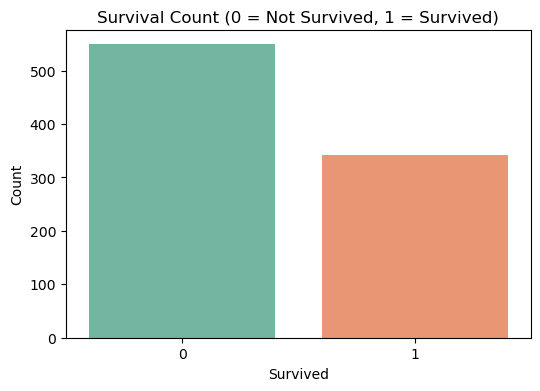

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette="Set2")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\2022720657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette="viridis")


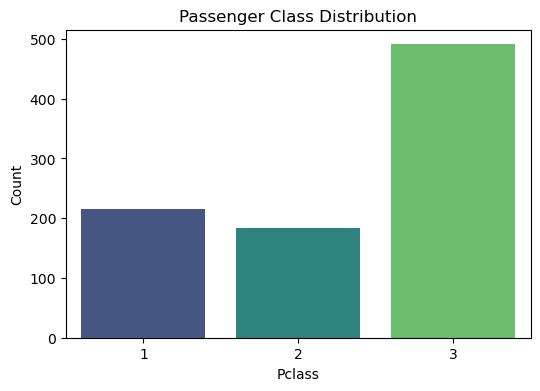

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette="viridis")
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='Sex_male', ylabel='Survived'>

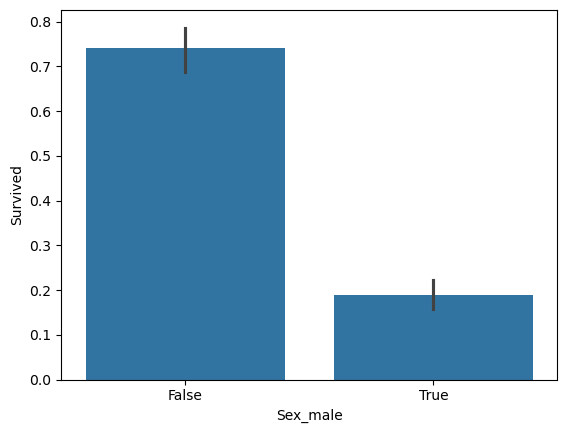

In [43]:
##Q6. Bivariate Analysis with Survival
sns.barplot(x='Sex_male', y='Survived', data=df)


Survived         0         1
AgeGroup                    
Child     0.420290  0.579710
Teen      0.571429  0.428571
Adult     0.636628  0.363372
Senior    0.656250  0.343750


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\596671863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette="coolwarm")


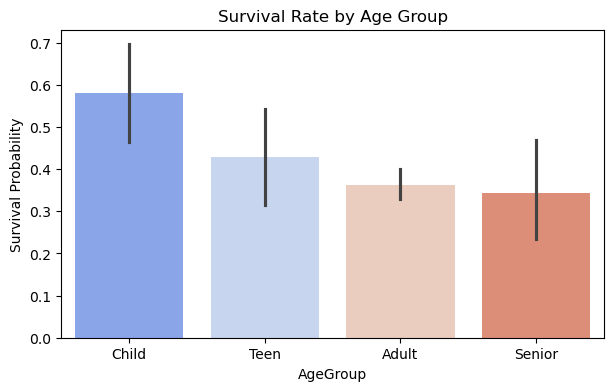

In [47]:
# Define age groups
bins = [0, 12, 18, 50, 80]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Crosstab
print(pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index'))

# Barplot
plt.figure(figsize=(7,4))
sns.barplot(x='AgeGroup', y='Survived', data=df, palette="coolwarm")
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Probability")
plt.show()


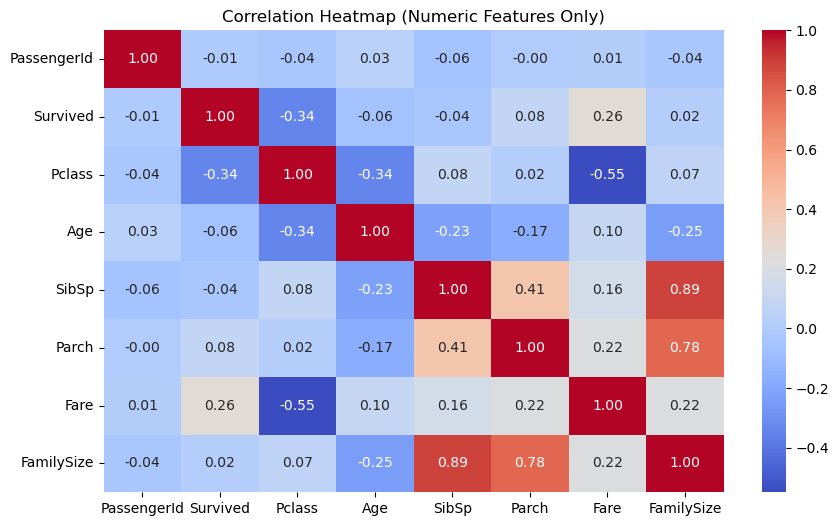


Correlation of features with Survived:
Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


In [49]:
##Q7. Correlation Matrix

numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

surv_corr = corr['Survived'].sort_values(ascending=False)
print("\nCorrelation of features with Survived:")
print(surv_corr)


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\768747136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette="Set2")


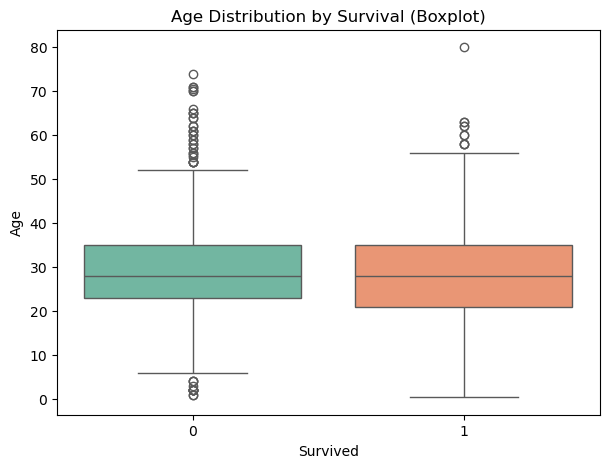

In [51]:
##Q8. Visualize Relationships
plt.figure(figsize=(7,5))
sns.boxplot(x='Survived', y='Age', data=df, palette="Set2")
plt.title("Age Distribution by Survival (Boxplot)")
plt.show()


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\1697921622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette="muted")


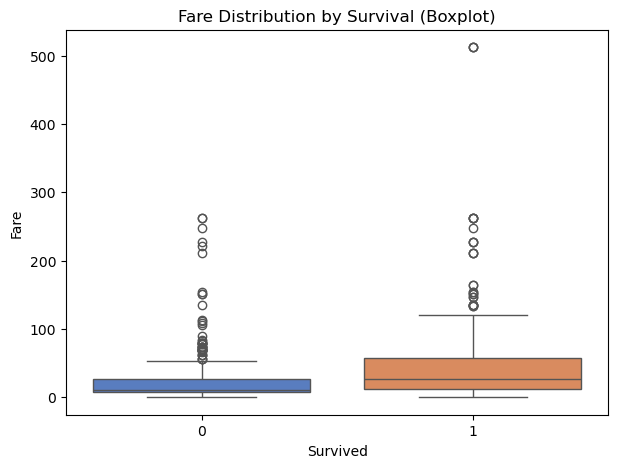

In [53]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Survived', y='Fare', data=df, palette="muted")
plt.title("Fare Distribution by Survival (Boxplot)")
plt.show()

C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\670729044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette="viridis")


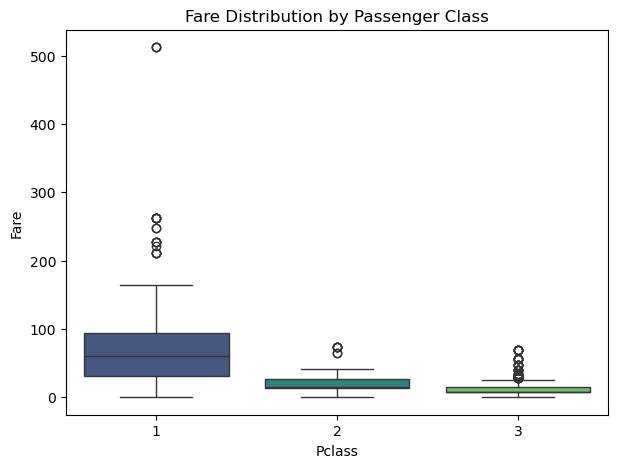

In [54]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette="viridis")
plt.title("Fare Distribution by Passenger Class")
plt.show()


In [55]:
##SECTION C
##Q9. Feature Engineering

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [56]:

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev',
               'Sir','Jonkheer','Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\2619152206.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [57]:

df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])


In [58]:

bins = [0, 12, 18, 35, 50, 80]
labels = ['Child','Teen','Young Adult','Adult','Senior']
df['AgeBin'] = pd.cut(df['Age'], bins=bins, labels=labels)


Survival Rate by Family Size:
             Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\3742542977.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette="Set2")


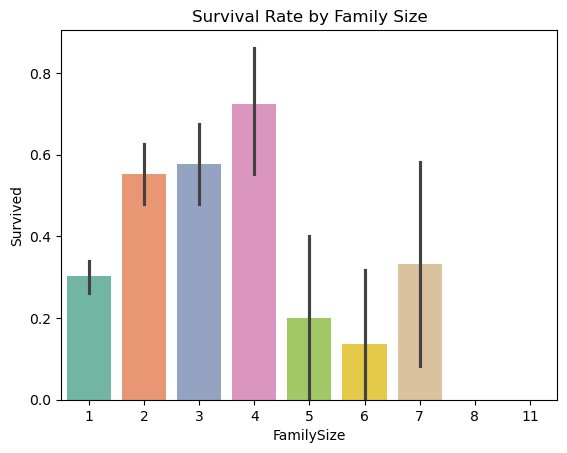

In [59]:
##Q10
family_survival = df.pivot_table(values='Survived', index='FamilySize', aggfunc='mean')
print("Survival Rate by Family Size:\n", family_survival)

sns.barplot(x='FamilySize', y='Survived', data=df, palette="Set2")
plt.title("Survival Rate by Family Size")
plt.show()



Survival Rate by Title:
         Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.347826


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\261628780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Survived', data=df, palette="muted")


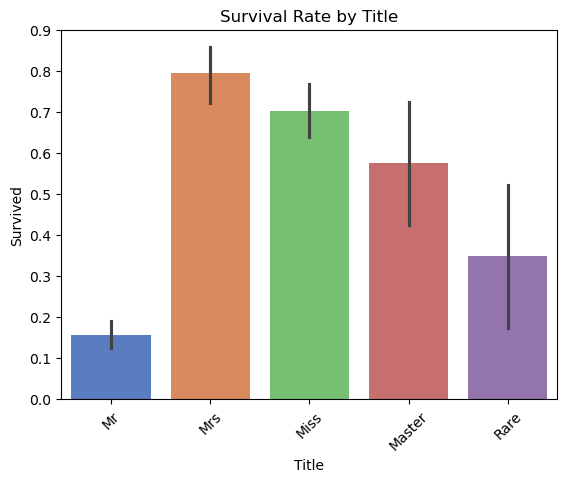

In [60]:
title_survival = df.pivot_table(values='Survived', index='Title', aggfunc='mean')
print("\nSurvival Rate by Title:\n", title_survival)

sns.barplot(x='Title', y='Survived', data=df, palette="muted")
plt.title("Survival Rate by Title")
plt.xticks(rotation=45)
plt.show()


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\2915341768.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fare_survival = df.pivot_table(values='Survived', index='FareBin', aggfunc='mean')
C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\2915341768.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FareBin', y='Survived', data=df, palette="coolwarm")



Survival Rate by Fare Band:
            Survived
FareBin            
Low        0.197309
Mid        0.303571
High       0.454955
Very High  0.581081


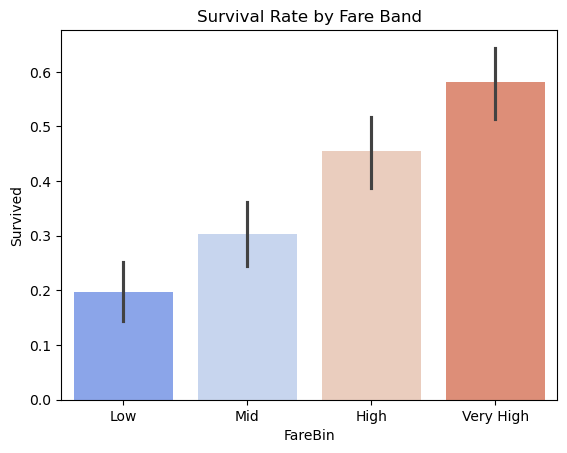

In [61]:
fare_survival = df.pivot_table(values='Survived', index='FareBin', aggfunc='mean')
print("\nSurvival Rate by Fare Band:\n", fare_survival)

sns.barplot(x='FareBin', y='Survived', data=df, palette="coolwarm")
plt.title("Survival Rate by Fare Band")
plt.show()


In [62]:
summary_table = df.pivot_table(values='Survived',
                               index=['FamilySize','Title','FareBin'],
                               aggfunc='mean')
print("\nCombined Survival Summary:\n", summary_table)



Combined Survival Summary:
                              Survived
FamilySize Title  FareBin            
1          Miss   Low        0.692308
                  Mid        0.666667
                  High       0.714286
                  Very High  1.000000
           Mr     Low        0.077381
...                               ...
8          Mr     Very High  0.000000
           Mrs    Very High  0.000000
11         Master Very High  0.000000
           Miss   Very High  0.000000
           Mr     Very High  0.000000

[80 rows x 1 columns]


C:\Users\ajink\AppData\Local\Temp\ipykernel_3948\4104712298.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summary_table = df.pivot_table(values='Survived',


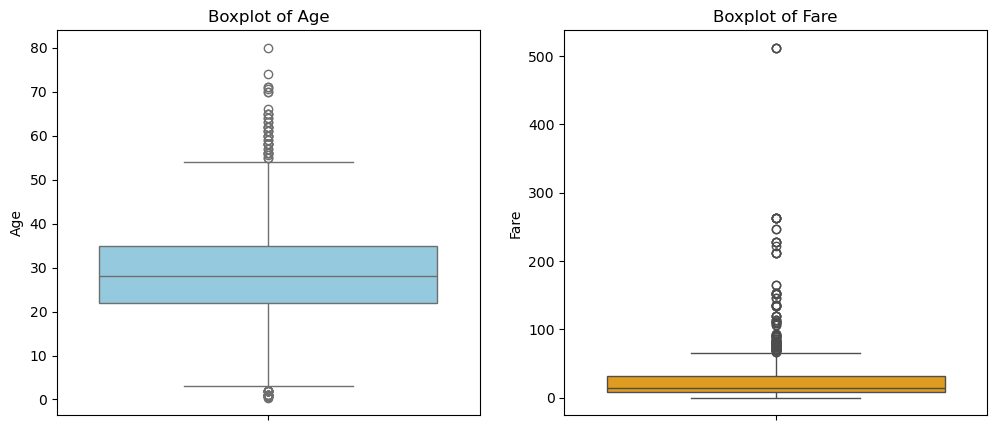

In [63]:
##Q11.Outlier Detection

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y='Age', data=df, color="skyblue")
plt.title("Boxplot of Age")

plt.subplot(1,2,2)
sns.boxplot(y='Fare', data=df, color="orange")
plt.title("Boxplot of Fare")

plt.show()


In [64]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Age
age_outliers, age_low, age_high = detect_outliers('Age')
print(f"Age outliers: {len(age_outliers)} | Lower bound: {age_low:.2f}, Upper bound: {age_high:.2f}")

# Fare
fare_outliers, fare_low, fare_high = detect_outliers('Fare')
print(f"Fare outliers: {len(fare_outliers)} | Lower bound: {fare_low:.2f}, Upper bound: {fare_high:.2f}")


Age outliers: 66 | Lower bound: 2.50, Upper bound: 54.50
Fare outliers: 116 | Lower bound: -26.72, Upper bound: 65.63


Age: Outliers (elderly passengers) are realistic values (e.g., older people existed onboard). Keep them.

Fare: High fares correspond to 1st-class luxury cabins (e.g., 512 for suite tickets). These are true values, not errors. Keep them.

Conclusion:
Although statistical methods mark them as outliers, they carry important information about survival patterns (e.g., high-fare passengers had higher survival).
So --> we retain outliers instead of removing them.

Let’s summarize the **Titanic EDA insights** and propose **recommendations** for predictive modeling.
# Final Insights Summary
### Top 5 Insights

1. **Gender is the strongest predictor**

   * Females had \~74% survival vs \~19% for males.
   * “Women and children first” policy clearly applied.

2. **Passenger Class strongly influenced survival**

   * 1st-class survival ~ 63%
   * 2nd-class ~ 47%
   * 3rd-class ~ 24%
   * Wealthier passengers had better access to lifeboats.

3. **Family Size effect**

   * Passengers with small families (2–4) survived more often.
   * Solo travelers and very large families had lower survival.

4. **Title (from Name) is a powerful feature**

   * `Miss`, `Mrs`, `Master` had higher survival.
   * `Mr` and rare titles (e.g., Rev, Col, Dr) had much lower chances.

5. **Fare and Embarkation matter**

   * Higher fare bands corresponded to higher survival (proxy for class/wealth).
   * Passengers from port **C (Cherbourg)** survived more than those from **S (Southampton)**.

### Recommendations for Predictive Models

1. **Feature Engineering Priority**

   * Use **Sex, Pclass, Title, FamilySize, FareBin, and AgeBin** as key engineered features.
   * They capture survival patterns better than raw values.

2. **Handle Outliers & Categories Carefully**

   * Do **not remove high fares or old ages** – they are real and informative.
   * Encode categorical features (`Sex`, `Embarked`, `Title`, `FareBin`, `AgeBin`) properly (one-hot or label encoding) for models.

---
With these insights, a model like **Random Forest, Gradient Boosting, or XGBoost** should capture non-linear relationships and interactions (e.g., `female + 1st class + small family` = very high survival).
